In [12]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import ConfusionMatrixDisplay

import statsmodels.api as sm
from scipy.stats import chi2

import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # Kiitos, Elina!

In [13]:
df2 = pd.read_csv("Loan_Data.csv")
df2.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [14]:
df2.dropna(inplace=True)

In [15]:
# muutetaan vastemuuttujat numeeriksi, 0 = normaali
df2['Gender'].replace(['Male', 'Female'], [1,2], inplace=True)
df2['Married'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Education'].replace(['Not Graduate', 'Graduate'], [0,1], inplace=True)
df2['Self_Employed'].replace(['No', 'Yes'], [0,1], inplace=True)
df2['Dependents'].replace(['0', '1', '2', '3+'], [0,1,2,3], inplace=True)
df2["Property_Area"].replace(["Urban","Semiurban","Rural"], [0,1,2], inplace=True)
df2['Loan_Status'].replace(['N', 'Y'], [0,1], inplace=True)

In [16]:
df2.drop("Loan_ID", axis=1, inplace=True)
df2.drop("Property_Area", axis=1, inplace=True)

lisää random state

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    int64  
 1   Married            480 non-null    int64  
 2   Dependents         480 non-null    int64  
 3   Education          480 non-null    int64  
 4   Self_Employed      480 non-null    int64  
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(7)
memory usage: 45.0 KB


### Mallinnus

In [19]:
X = df2.loc[:,['Gender', 'Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
Y = df2.iloc[:,10] # vastemuuttuja on positio 10 eli Loan_Status

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

In [21]:
scaler = StandardScaler().fit(x_train) 
scaler
print('mean', scaler.mean_)
print('scale', scaler.scale_)

mean [1.18229167e+00 6.32812500e-01 7.57812500e-01 8.02083333e-01
 1.53645833e-01 5.41157812e+03 1.63548677e+03 1.43625000e+02
 3.41156250e+02 8.46354167e-01]
scale [3.86084725e-01 4.82038214e-01 1.00839776e+00 3.98428990e-01
 3.60608917e-01 6.08644786e+03 2.77190647e+03 7.73210636e+01
 6.72163528e+01 3.60608917e-01]


In [22]:
x_train_scaled = scaler.transform(x_train)
print('scaled', x_train_scaled)

print('mean', x_train_scaled.mean(axis=0))
print('std', x_train_scaled.std(axis=0))

scaled [[-0.47215457  0.7617394   2.22351495 ... -0.80993454 -2.39757504
   0.42607331]
 [ 2.11795049 -1.31278492 -0.75150157 ... -0.3702096   0.28034473
   0.42607331]
 [-0.47215457  0.7617394   1.23184278 ...  0.17298003  0.28034473
   0.42607331]
 ...
 [-0.47215457  0.7617394   0.2401706  ... -0.1762133   0.28034473
   0.42607331]
 [-0.47215457  0.7617394  -0.75150157 ...  0.23764546  0.28034473
   0.42607331]
 [-0.47215457  0.7617394   1.23184278 ... -0.71940293  0.28034473
   0.42607331]]
mean [-1.66533454e-16  4.16333634e-17  4.62592927e-17 -1.71159383e-16
 -3.70074342e-17 -4.62592927e-18  1.15648232e-17  4.62592927e-18
  3.00685403e-17  1.29526020e-16]
std [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [23]:
# Mallin rakentaminen ja sovittaminen, käytetään skaalattua x_trainia
reg = LogisticRegression()
reg.fit(x_train_scaled,y_train)

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[-0.10924843  0.24569282 -0.01393852  0.14221473 -0.04109251  0.08831345
  -0.15120948 -0.23193234 -0.02539017  1.18915097]]
Intercept:  [0.84936666]


In [24]:
# x_testin skaalaus
scaler2 = StandardScaler().fit(x_test)
scaler2
# print('mean', scaler2.mean_)
# print('scale', scaler2.scale_)

StandardScaler()

In [25]:
x_test_scaled = scaler2.transform(x_test)

In [26]:
p_pred = reg.predict_proba(x_test_scaled) # todennäköisyys joka tilastoriville

In [27]:
y_pred = reg.predict(x_test_scaled) #ennustetulos, joka todennäköisyyden perusteella joka tilastoriville

### Mallin sopivuus

In [31]:
# Assuming X is your features and y is your binary target variable
# Step 1: Add a constant (intercept) to X
X_with_const = sm.add_constant(x_test_scaled)

# Step 2: Fit the logistic regression model with statsmodels
logit_model = sm.Logit(y_test, X_with_const).fit(disp=0)

# Step 3: Get the null deviance and residual deviance
# Null deviance is the deviance of the intercept-only model
null_deviance = -2 * logit_model.llnull  # Deviance of the null model
# Residual deviance is the deviance of the full model with predictors
residual_deviance = -2 * logit_model.llf  # Deviance of the fitted model

# Degrees of freedom for the Chi-squared test
df = logit_model.df_model

# Chi-square test statistic
chi2_stat = null_deviance - residual_deviance

# Calculate the p-value
p_value = chi2.sf(chi2_stat, df)

# Print results
print("Chi-squared statistic:", chi2_stat) # Tää on se GOF, hyvä, koska suuri luku
print("Degrees of freedom:", df) # selittävien muuttujien määrä
print("p-value:", p_value) # Hyvä, koska tdeolla pieni luku, ilmeisesti....

# Interpretation:
# A low p-value (e.g., < 0.05) indicates that the model with predictors

Chi-squared statistic: 43.93216116804798
Degrees of freedom: 10.0
p-value: 3.3853112416788597e-06


c:\Users\35850\OneDrive\Tiedostot\Opiskelu\Koodaus\Logistic_regression\env\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [33]:
print(classification_report(y_test, y_pred, target_names=["lainaYES", "lainaNO"]))

              precision    recall  f1-score   support

    lainaYES       1.00      0.39      0.56        28
     lainaNO       0.80      1.00      0.89        68

    accuracy                           0.82        96
   macro avg       0.90      0.70      0.73        96
weighted avg       0.86      0.82      0.79        96



In [35]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:\n",cm)

Confusion matrix:
 [[11 17]
 [ 0 68]]


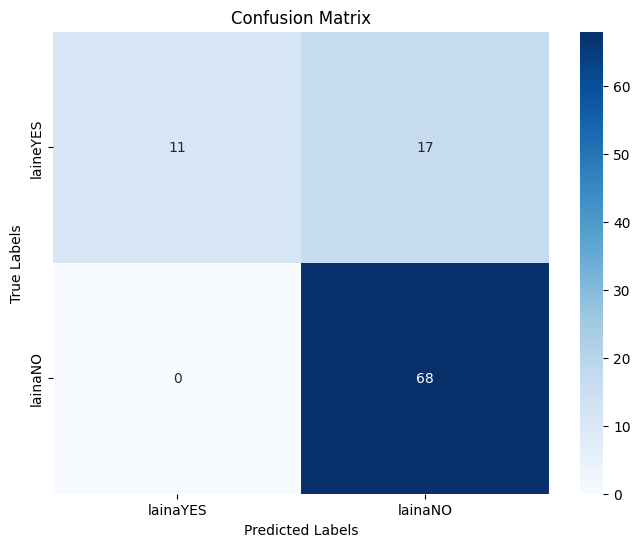

In [36]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['lainaYES', 'lainaNO'], yticklabels=['laineYES', 'lainaNO'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()